In [1]:
!pip install opencv-python
print('done')

done


In [4]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

#https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3
# Read image
#names = ["orange3.jpg","lemon6.jpg","banana1.jpg","orange2.jpg","lemon5.jpg","banana3.jpg"]
#name = names[5]
#image = cv2.imread('ims/%s'% name)

image = cv2.imread("ims/orange3.jpg")
#image = cv2.imread("ims/lemon6.jpg")
#image = cv2.imread("ims/banana1.jpg")

vectorized = image.reshape((-1,3))
vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10
ret,label,center=cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
#ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((image.shape))

# https://stackoverflow.com/questions/42203898/python-opencv-blob-detection-or-circle-detection
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
result_image = cv2.GaussianBlur(result_image, (11, 11), 0)
ret, result_image = cv2.threshold(result_image, 220, 255, cv2.THRESH_BINARY)
contours, heirarchy = cv2.findContours(result_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_area = []
# calculate area and filter into new array
for con in contours:
    area = cv2.contourArea(con)
    if 0.05*result_image.size < area < 0.92*result_image.size:
        contours_area.append(con)

cv2.drawContours(image,contours_area,-1,(255,0,0),3)

#cv2.imwrite(name, image)
#cv2.imshow('%s' %name, image)
#cv2.imshow('result_image', result_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
# https://stackoverflow.com/questions/33369832/read-multiple-images-on-a-folder-in-opencv-python/43049639
bananas = []
oranges = []
lemons = []
for file in glob.glob("ims/banana*.jpg"):
    bananas.append(file)
for file in glob.glob("ims/orange*.jpg"):
    oranges.append(file)
for file in glob.glob("ims/lemon*.jpg"):
    lemons.append(file)

# print(bananas)
# print(oranges)
# print(lemons)

def fundament(name):
    image = cv2.imread(name)

    vectorized = image.reshape((-1,3))
    vectorized = np.float32(vectorized)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    attempts = 10
    ret,label,center=cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)

    res = center[label.flatten()]
    result_image = res.reshape((image.shape))
    
    if np.linalg.norm(center[0]) > np.linalg.norm(center[1]):
        color = center[1]
    else:
        color = center[0]

    # https://stackoverflow.com/questions/42203898/python-opencv-blob-detection-or-circle-detection
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
    result_image = cv2.GaussianBlur(result_image, (11, 11), 0)
    ret, result_image = cv2.threshold(result_image, 220, 255, cv2.THRESH_BINARY)
    contours, heirarchy = cv2.findContours(result_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours_area = []
    # calculate area and filter into new array
    for con in contours:
        area = cv2.contourArea(con)
        if 0.05*result_image.size < area < 0.92*result_image.size:
            contours_area.append(con)

    return color, contours_area

banana_contours = []
orange_contours = []
lemon_contours = []
banana_color = []
orange_color = []
lemon_color = []
for name in bananas:
    rgb, c = fundament(name)
    banana_contours.append(c)
    banana_color.append(rgb)
for name in oranges:
    rgb, c = fundament(name)
    orange_contours.append(c)
    orange_color.append(rgb)
for name in lemons:
    rgb, c = fundament(name)
    lemon_contours.append(c)
    lemon_color.append(rgb)

# https://docs.opencv.org/3.4/d1/d32/tutorial_py_contour_properties.html
banana_ar = []
orange_ar = []
lemon_ar = []
# compute aspect ratio
for c in banana_contours:
    x,y,w,h = cv2.boundingRect(c[0])
    aspect_ratio = float(w)/h
    banana_ar.append(aspect_ratio)
for c in orange_contours:
    x,y,w,h = cv2.boundingRect(c[0])
    aspect_ratio = float(w)/h
    orange_ar.append(aspect_ratio)
for c in lemon_contours:
    x,y,w,h = cv2.boundingRect(c[0])
    aspect_ratio = float(w)/h
    lemon_ar.append(aspect_ratio)

print('done')

done


In [6]:
banana_solidity = []
orange_solidity = []
lemon_solidity = []
# compute solidity
for c in banana_contours:
    area = cv2.contourArea(c[0])
    hull = cv2.convexHull(c[0])
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    banana_solidity.append(solidity)
for c in orange_contours:
    area = cv2.contourArea(c[0])
    hull = cv2.convexHull(c[0])
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    orange_solidity.append(solidity)
for c in lemon_contours:
    area = cv2.contourArea(c[0])
    hull = cv2.convexHull(c[0])
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    lemon_solidity.append(solidity)

print('done')

done


In [7]:
# https://www.rapidtables.com/convert/color/rgb-to-hsv.html
def bgr2hsv(bgr):
    b = float(bgr[0]/255)
    g = float(bgr[1]/255)
    r = float(bgr[2]/255)
    
    cmax = max([r,g,b])
    cmin = min([r,g,b])
    d = cmax-cmin
    
    if d == 0:
        h = 0
    elif cmax == r:
        h = 60*(((g-b)/d)%6)
    elif cmax == g:
        h = 60*(((b-r)/d)+2)
    elif cmax == b:
        h = 60*(((r-g)/d)+4)
    
    if cmax == 0:
        s = 0
    else:
        s = d/cmax
    
    v = cmax
    return h

banana_h = []
orange_h = []
lemon_h = []
for color in banana_color:
    h = bgr2hsv(color)
    banana_h.append(h)
for color in orange_color:
    h = bgr2hsv(color)
    orange_h.append(h)
for color in lemon_color:
    h = bgr2hsv(color)
    lemon_h.append(h)
print('done')

done


In [8]:
#normalize
max_ar = max([max(banana_ar), max(orange_ar), max(lemon_ar)])
max_solidity = max([max(banana_solidity), max(orange_solidity), max(lemon_solidity)])
max_h = max([max(banana_h), max(orange_h), max(lemon_h)])
for i in range(len(banana_ar)):
    banana_ar[i] /= max_ar
    orange_ar[i] /= max_ar
    lemon_ar[i] /= max_ar
    
    banana_solidity[i] /= max_solidity
    orange_solidity[i] /= max_solidity
    lemon_solidity[i] /= max_solidity
    
    banana_h[i] /= max_h
    orange_h[i] /= max_h
    lemon_h[i] /= max_h

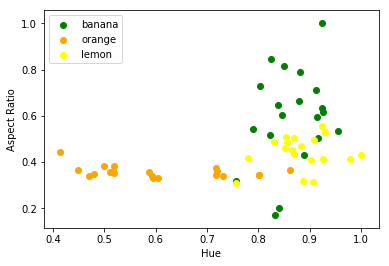

In [9]:
fig, ax = plt.subplots()
ax.scatter(banana_h, banana_ar, color = 'green', label = 'banana')
ax.scatter(orange_h, orange_ar, color = 'orange', label = 'orange')
ax.scatter(lemon_h, lemon_ar, color = 'yellow', label = 'lemon')
plt.xlabel('Hue')
plt.ylabel('Aspect Ratio')
plt.legend()
plt.show()

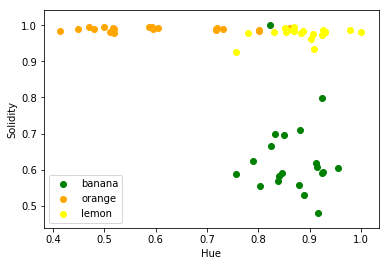

In [10]:
fig, ax = plt.subplots()
ax.scatter(banana_h, banana_solidity, color = 'green', label = 'banana')
ax.scatter(orange_h, orange_solidity, color = 'orange', label = 'orange')
ax.scatter(lemon_h, lemon_solidity, color = 'yellow', label = 'lemon')
plt.xlabel('Hue')
plt.ylabel('Solidity')
plt.legend()
plt.show()

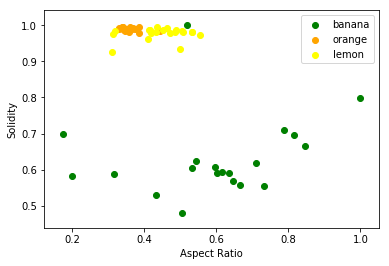

In [11]:
fig, ax = plt.subplots()
ax.scatter(banana_ar, banana_solidity, color = 'green', label = 'banana')
ax.scatter(orange_ar, orange_solidity, color = 'orange', label = 'orange')
ax.scatter(lemon_ar, lemon_solidity, color = 'yellow', label = 'lemon')
plt.xlabel('Aspect Ratio')
plt.ylabel('Solidity')
plt.legend()
plt.show()

In [13]:
# inputs = np.array([[banana_ar, orange_ar, lemon_ar],
#                    [banana_solidity, orange_solidity, lemon_solidity],
#                    [banana_h, orange_h, lemon_h]])
np.save('banana_ar.npy',banana_ar)
np.save('orange_ar.npy',orange_ar)
np.save('lemon_ar.npy',lemon_ar)
np.save('banana_solidity.npy',banana_solidity)
np.save('orange_solidity.npy',orange_solidity)
np.save('lemon_solidity.npy',lemon_solidity)
np.save('banana_h.npy',banana_h)
np.save('orange_h.npy',orange_h)
np.save('lemon_h.npy',lemon_h)
print('done')

done
